In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
data = pd.read_csv("data_timor.csv")
#data belgemi tanıması için jupiterimi data ile aynı dosya içerisinde açıyorum.

In [54]:
data.head()
data.tail()
# molignant : M : kötü huylu 
#benign : B : iyi uylu timor

data.drop(["id","Unnamed: 32"], axis=1,inplace=True)
# id numaralarından ve unnamed32 kolonundan kurtuluyoruz çünkü gereksiz, bunlara ihtiyacımız yok.
# axis=1 : tüm kolonu yok et.

In [55]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
#iyi ve kötü huylu timorleri ayırdık

In [56]:
M.info()
#212 adet kötü huylu timor varmış

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [57]:
B.info()
#357 adet iyi huylu timor varmış

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

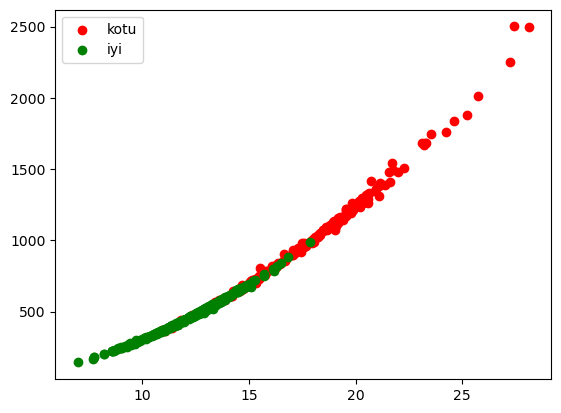

In [58]:
#scatter plot ile görselleştirelim
plt.scatter(M.radius_mean,M.area_mean,color="red",label="kotu")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="iyi")
#radius: yarıçap, area:alan
#kötü huyluları kırmızı renk ve kotu olarak adlandırdık, iyi huyluları yeşil ve iyi.

plt.legend() #tanımladığımız renk ve isimleri gösterir
plt.show()


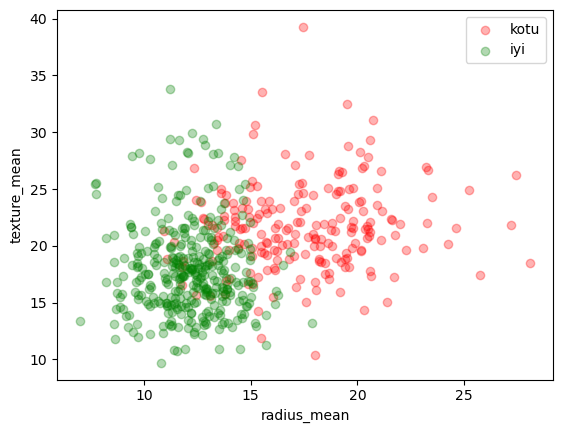

In [59]:
#iyi ve kötü huyluları daha temiz ayırt etmek için radius ve texture niteiklerini deneyelim:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha = 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
#x ve y eksenlerini isimlendirdik.
plt.legend()
plt.show()

In [60]:
#tüm niteliklere aynı işlemleri uygulayarak görselleştirme yapabiliriz.

In [61]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

In [62]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

C:\Users\CANSU\anaconda33\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\CANSU\anaconda33\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\CANSU\anaconda33\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [63]:
#traintestsplit
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [64]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [65]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [66]:
print(" {} nn score: {}".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059


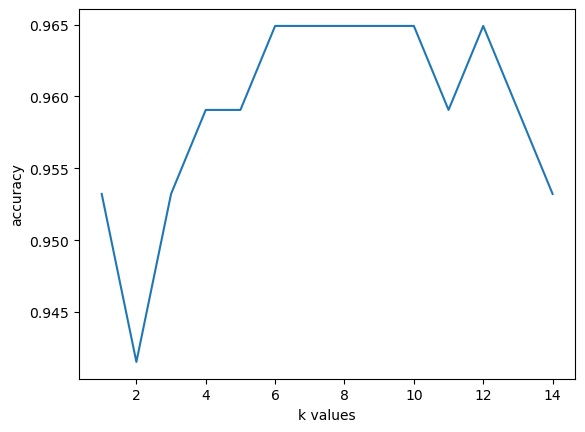

In [67]:
# find K value
score_list = []
for each in range (1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [68]:
# k value=8 en iyi değerleri veriyor!